In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_data = pd.read_csv('hmeq-1.csv')
train_data.sample(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3802,1,20000,117820.0,154000.0,DebtCon,Mgr,3.0,0.0,0.0,70.998127,0.0,29.0,NaN
947,0,9100,53764.0,56429.0,HomeImp,Other,9.0,0.0,0.0,92.078979,3.0,33.0,40.582084
2136,0,13400,156455.0,180313.0,DebtCon,ProfExe,6.0,NaN,1.0,210.718256,4.0,25.0,40.247373
2629,0,15100,68043.0,80686.0,DebtCon,Office,4.0,0.0,0.0,119.672491,1.0,20.0,21.418227
5292,1,29000,72478.0,113000.0,DebtCon,Other,1.5,0.0,6.0,114.666667,4.0,12.0,NaN


Bộ dữ liệu HMEQ báo cáo các đặc điểm và thông tin về sự vi phạm đối với 5.960 khoản vay vốn chủ sở hữu nhà. 
Khoản vay vốn chủ sở hữu nhà là một khoản vay mà người vay sử dụng giá trị vốn chủ sở hữu của ngôi nhà làm tài
sản thế chấp. Bộ dữ liệu có các đặc điểm sau:
-BAD: 1 = người nộp đơn đã vỡ nợ hoặc nợ quá hạn nghiêm trọng; 0 = người nộp đơn đã thanh toán khoản vay 
-LOAN: Số tiền yêu cầu vay
-MORTDUE: Số tiền nợ còn lại trên khoản thế chấp hiện tại
-VALUE: Giá trị tài sản hiện tại.
-REASON: lý do vay DebtCon = debt consolidation (ghép nợ); HomeImp = home improvement (sửa sang nhà cửa).
-JOB: loại công việc, bao gồm các nhóm “Office”, “Sales”, “Mananger”, “Professional Executive”, “Self business” và các công việc khác.
-YOJ: Số năm làm việc tại công việc hiện tại
-DEROG: Số lượng báo cáo vỡ nợ.
-DELINQ: Số hạn mức tín dụng quá hạn
-CLAGE:Tuổi của hạn mức tín dụng lâu nhất tính theo tháng
-NINQ: Số lượng yêu cầu tín dụng gần đây
-CLNO: Số lượng hạn mức tín dụng
-DEBTINC: Tỷ lệ nợ/thu nhập

In [4]:
num_train_rows, num_train_cols = train_data.shape
print(f"Number of rows: {num_train_rows}\nNumber of columns: {num_train_cols}")

Number of rows: 5960
Number of columns: 13


In [5]:
missing_values_train = pd.DataFrame({'Feature': train_data.columns,
                              '[TRAIN] No. of Missing Values': train_data.isnull().sum().values,
                              '[TRAIN] % of Missing Values': ((train_data.isnull().sum().values)/len(train_data)*100)})

unique_values = pd.DataFrame({'Feature': train_data.columns,
                              'No. of Unique Values[FROM TRAIN]': train_data.nunique().values})

feature_types = pd.DataFrame({'Feature': train_data.columns,
                              'DataType': train_data.dtypes})

merged_df = pd.merge(missing_values_train,unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='Feature', how='left')

merged_df.style.background_gradient(cmap='inferno')

,Feature,[TRAIN] No. of Missing Values,[TRAIN] % of Missing Values,No. of Unique Values[FROM TRAIN],DataType
0,BAD,0,0.000000,2,int64
1,LOAN,0,0.000000,540,int64
2,MORTDUE,518,8.691275,5053,float64
3,VALUE,112,1.879195,5381,float64
4,REASON,252,4.228188,2,object
5,JOB,279,4.681208,6,object
6,YOJ,515,8.640940,99,float64
7,DEROG,708,11.879195,11,float64
8,DELINQ,580,9.731544,14,float64
9,CLAGE,308,5.167785,5314,float64


In [6]:
train_duplicates = train_data.duplicated().sum()
print(f"Number of duplicate rows in train_data: {train_duplicates}")

Number of duplicate rows in train_data: 0


In [7]:
print('Description of all the numerical columns present in the train dataset')
train_data.describe().T.style.background_gradient(cmap='inferno')

Description of all the numerical columns present in the train dataset


,count,mean,std,min,25%,50%,75%,max
BAD,5960.000000,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.000000,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.000000,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.000000,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.000000,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.000000,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.000000,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.000000,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.000000,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.000000,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [8]:
numerical_variables = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
print(f"Numerical variables: {numerical_variables}")
categorical_variables = ['REASON', 'JOB']
print(f"Categorical variables: {categorical_variables}")
targer_variable = 'BAD'

Numerical variables: ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
Categorical variables: ['REASON', 'JOB']


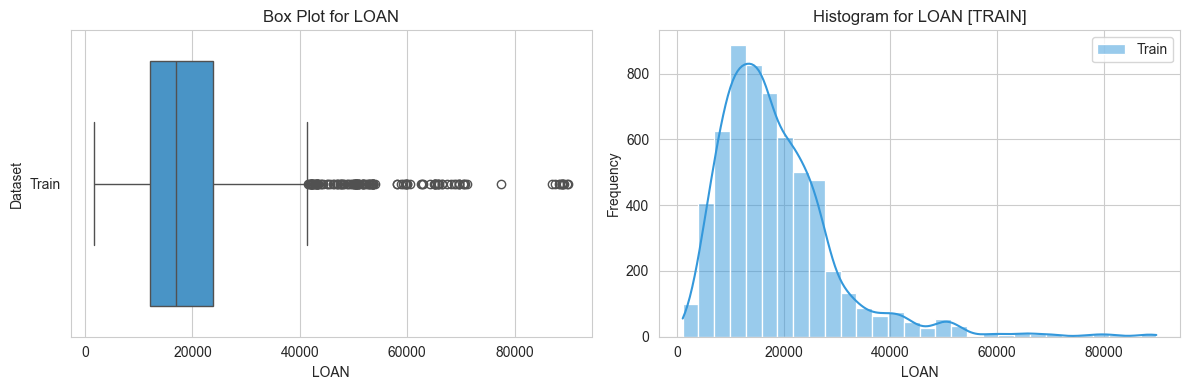

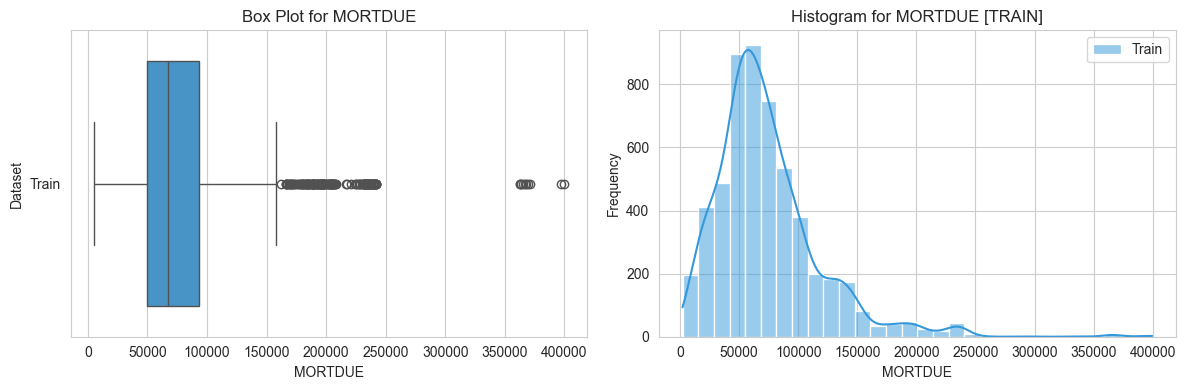

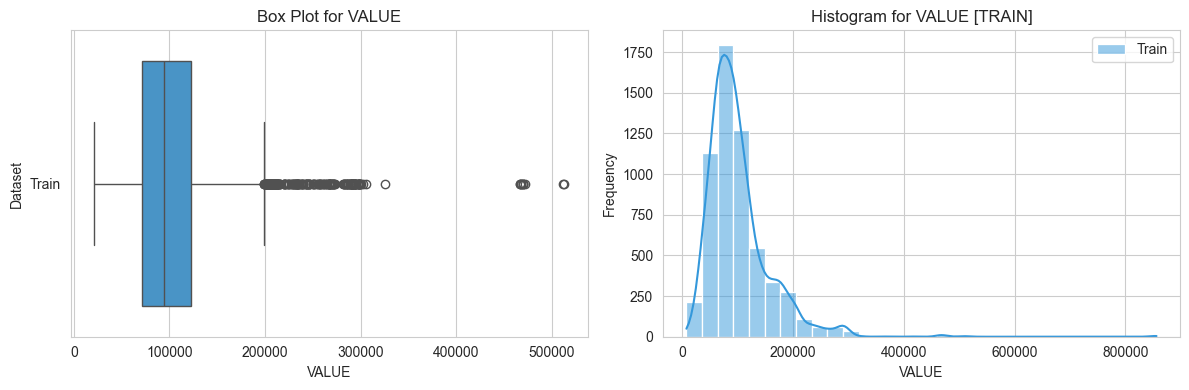

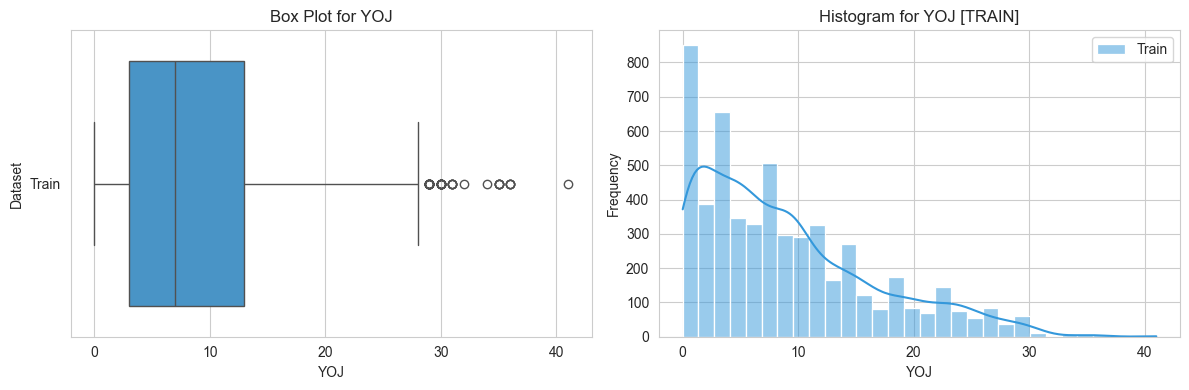

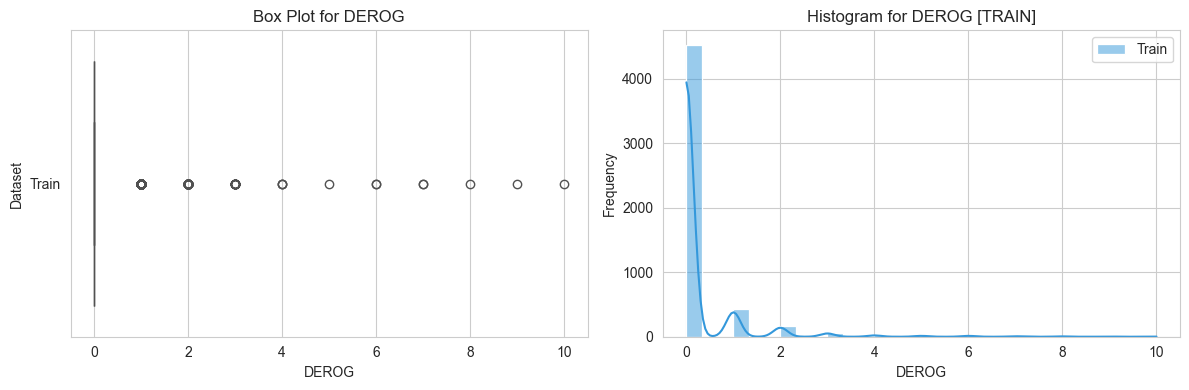

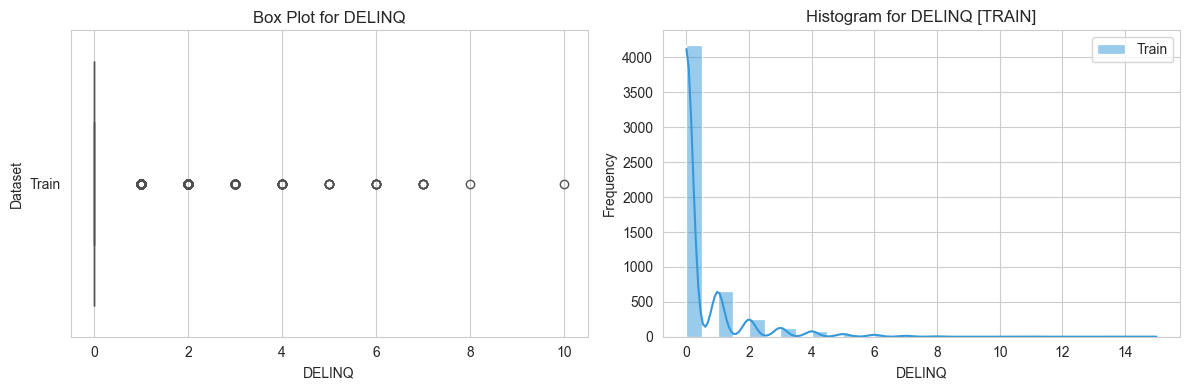

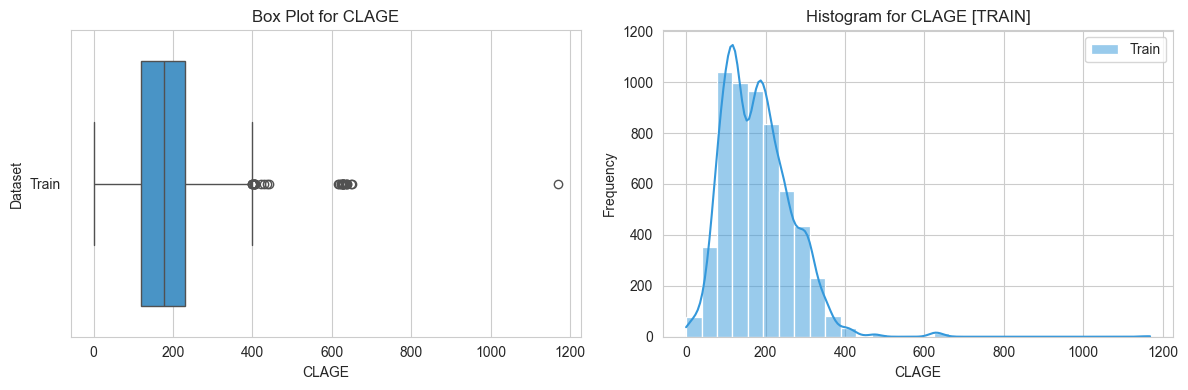

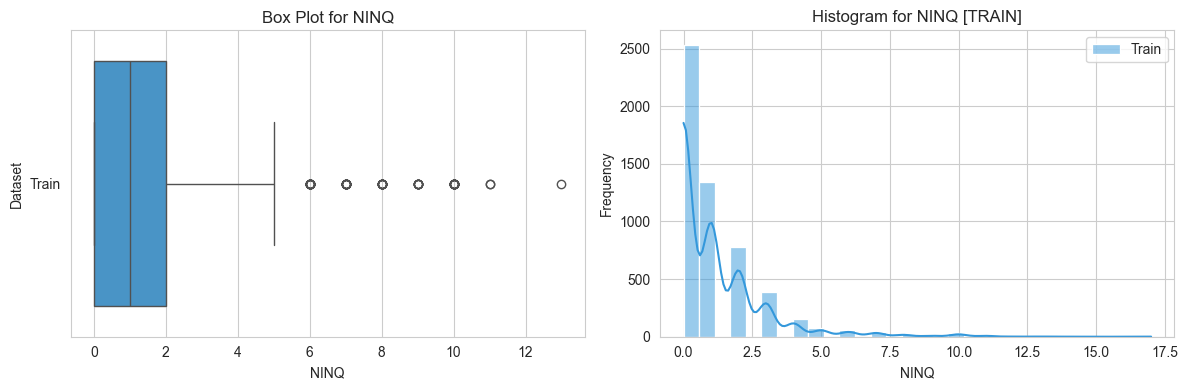

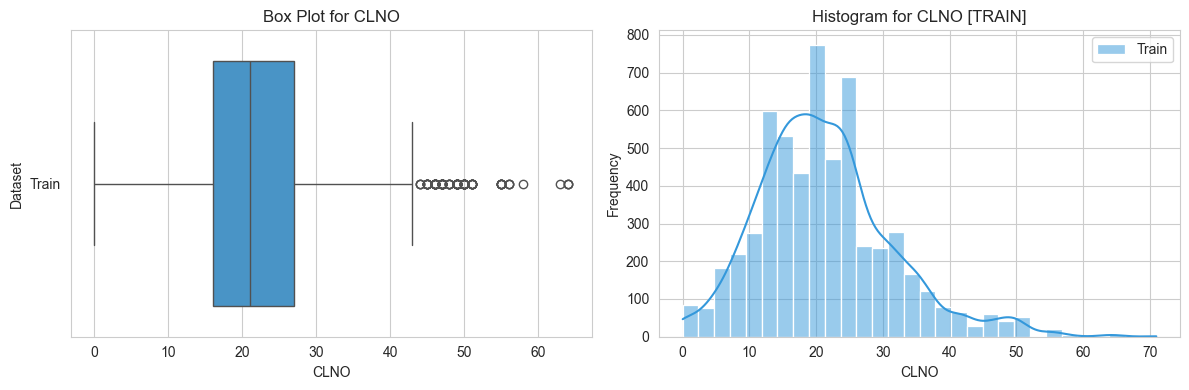

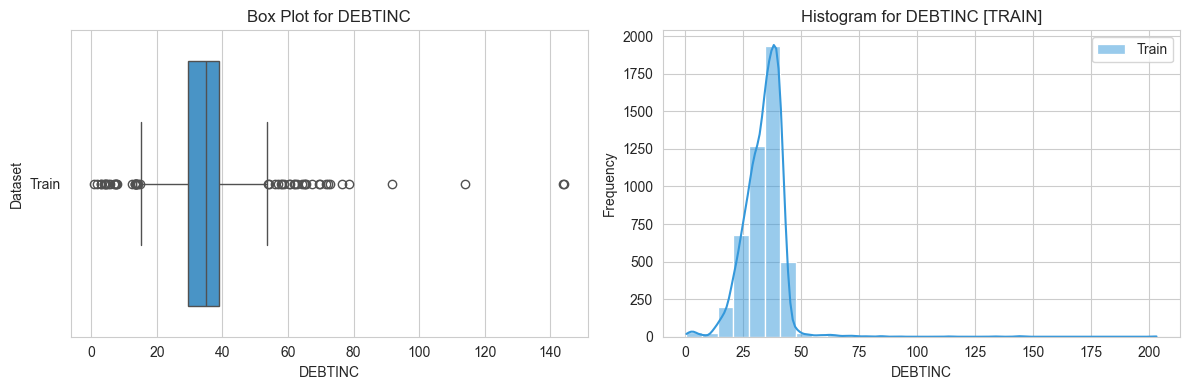

In [9]:
custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# Add 'Dataset' column to distinguish between train and test data
train_data['Dataset'] = 'Train'

# Function to create and display a row of plots for a single variable
def create_variable_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=pd.concat([train_data.dropna()]), x=variable, y="Dataset", palette=custom_palette)
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")

    # Separate Histograms
    plt.subplot(1, 2, 2)
    sns.histplot(data=train_data, x=variable, color=custom_palette[0], kde=True, bins=30, label="Train")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable} [TRAIN]")
    plt.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each variable
for variable in numerical_variables:
    create_variable_plots(variable)

# Drop the 'Dataset' column after analysis
train_data.drop('Dataset', axis=1, inplace=True)

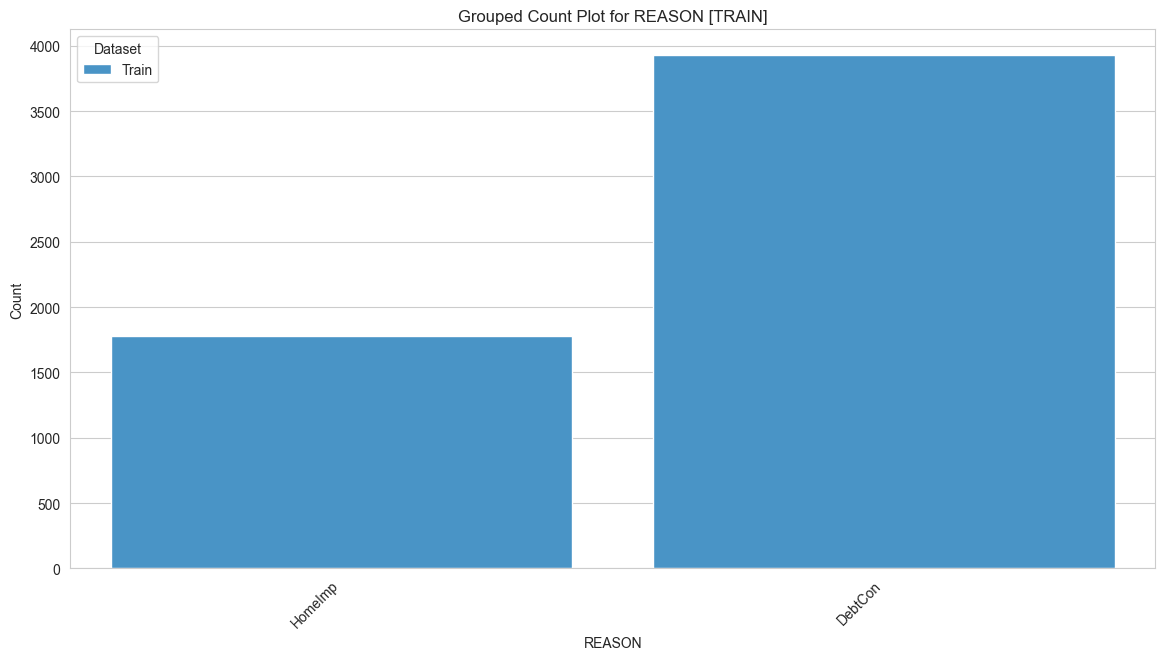

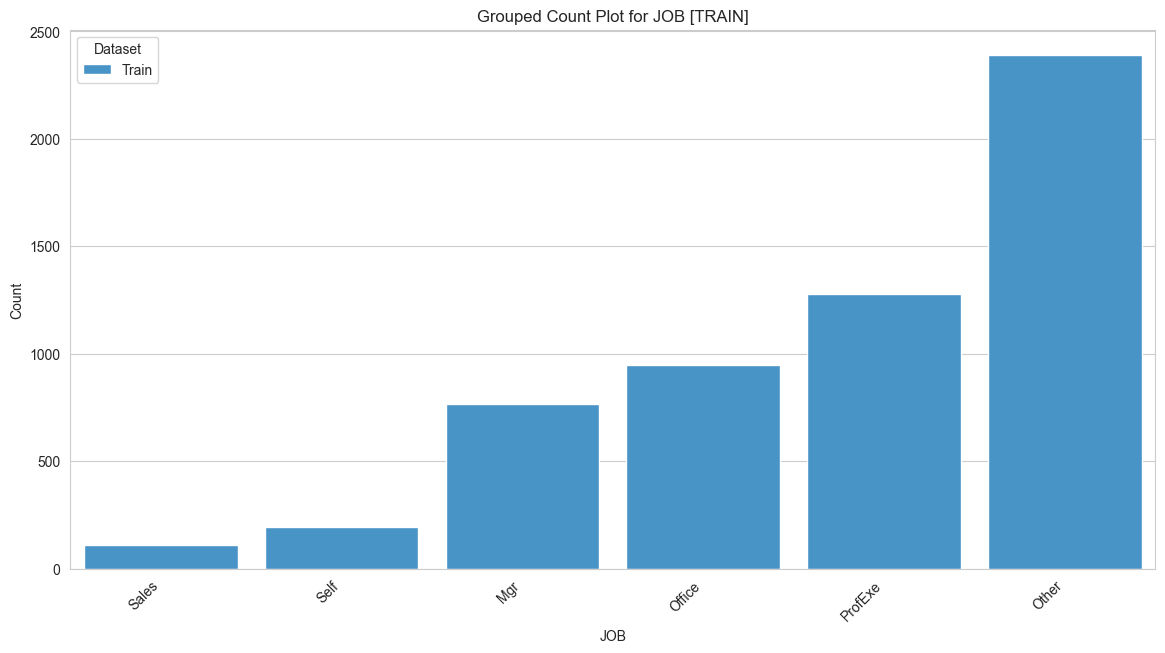

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define colors for Train data
custom_palette = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green

# Function to create and display a grouped count plot for a single categorical variable
def create_categorical_barplot(variable):
    sns.set_style('whitegrid')

    # Combine the datasets and create a new column indicating the source
    train_data_copy = train_data.copy()

    train_data_copy['Dataset'] = 'Train'


    # Get sorted order of categories based on Train data count (small to big)
    train_counts = train_data[variable].value_counts().sort_values(ascending=True).index.tolist()

    # Plot grouped countplot (Horizontal bars)
    plt.figure(figsize=(14, 7))
    sns.countplot(
        data=train_data_copy, 
        x=variable,  # Swapped axes
        hue="Dataset", 
        palette=custom_palette, 
        dodge=True,  # Ensures grouped bars
        width=0.85,  # Further increased bar width
        order=train_counts  # Sorting categories by Train data count (small to big)
    )

    plt.ylabel("Count")
    plt.xlabel(variable)
    plt.title(f"Grouped Count Plot for {variable} [TRAIN]")
    plt.legend(title="Dataset")

    # Rotate x labels for better visibility
    plt.xticks(rotation=45, ha="right")

    # Show the plot
    plt.show()

# Perform univariate analysis for each categorical variable
for variable in categorical_variables:
    create_categorical_barplot(variable)

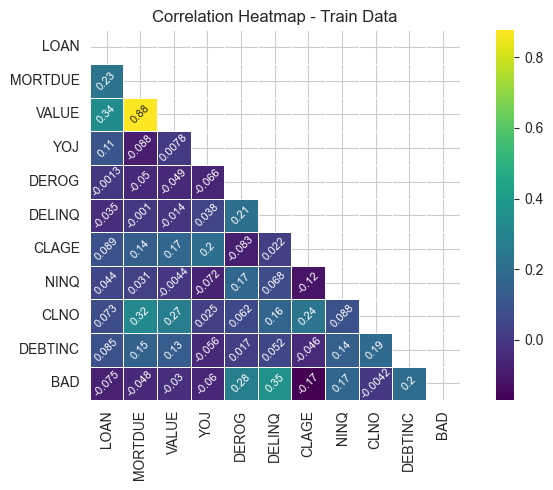

In [11]:
variables = [col for col in train_data.columns if col in numerical_variables]

# Adding variables to the existing list
train_variables = variables+ ['BAD']

# Calculate correlation matrices for train_data and test_data
corr_train = train_data[train_variables].corr()

# Create masks for the upper triangle
mask_train = np.triu(np.ones_like(corr_train, dtype=bool))

# Set the text size and rotation
annot_kws = {"size": 8, "rotation": 45}

# Generate heatmaps for train_data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax_train = sns.heatmap(corr_train, mask=mask_train, cmap='viridis', annot=True,
                      square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Train Data')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

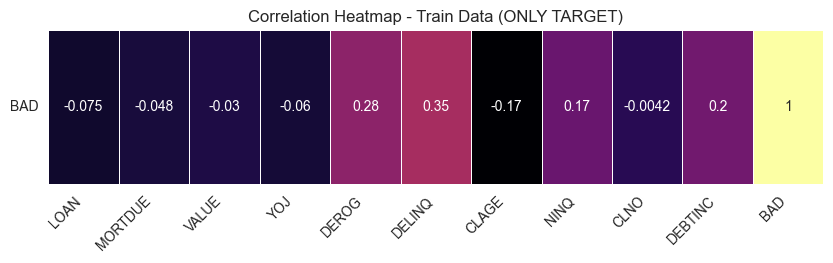

In [12]:
# Selecting numerical features + target variable
variables = [col for col in train_data.columns if col in numerical_variables]
train_variables = variables + ['BAD']

# Compute correlation with 'BAD' and transpose for horizontal display
corr_train = train_data[train_variables].corr()[['BAD']].T
annot_kws = {"size": 10}
plt.figure(figsize=(10, 2))
ax_train = sns.heatmap(corr_train, cmap='inferno', annot=True, 
                      square=False, linewidths=0.5, annot_kws=annot_kws, 
                      cbar=False)

# Formatting
plt.xticks(rotation=45, ha="right")
plt.title('Correlation Heatmap - Train Data (ONLY TARGET)')
plt.yticks(rotation=0)

# Show plot
plt.show()

                 Missing Rate (BAD=0)  Missing Rate (BAD=1)  Difference
missing_DEBTINC              0.100817              0.661060    0.560242
missing_VALUE                0.001467              0.088310    0.086842
missing_CLAGE                0.048208              0.065601    0.017393
missing_CLNO                 0.035422              0.044575    0.009153
missing_MORTDUE              0.086355              0.089151    0.002795
missing_BAD                  0.000000              0.000000    0.000000
missing_LOAN                 0.000000              0.000000    0.000000
missing_REASON               0.042758              0.040370   -0.002388
missing_NINQ                 0.091176              0.063078   -0.028098
missing_JOB                  0.053658              0.019344   -0.034314
missing_YOJ                  0.094320              0.054668   -0.039652
missing_DELINQ               0.106477              0.060555   -0.045922
missing_DEROG                0.130161              0.073171   -0

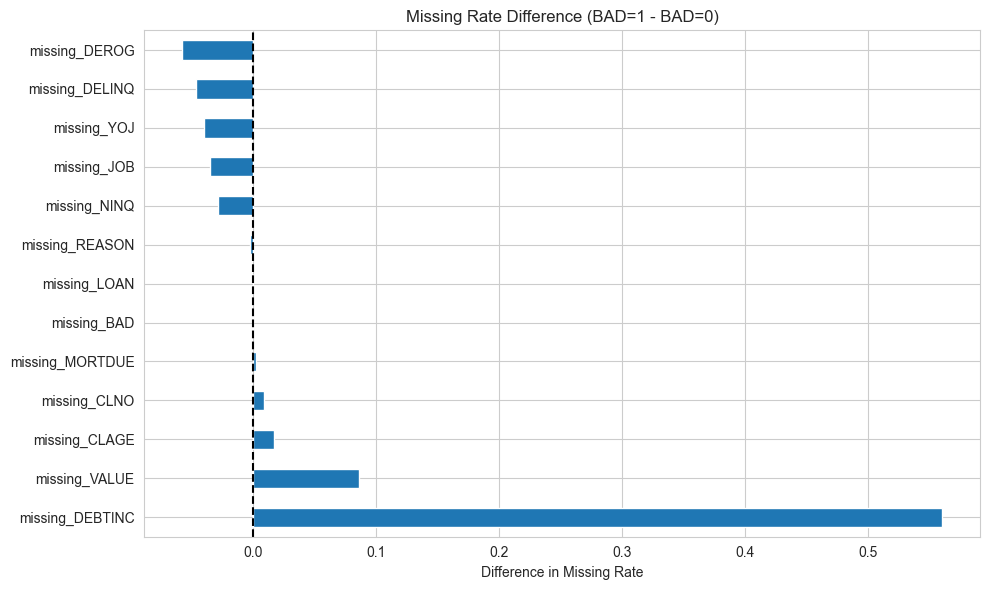

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create missing indicators
missing_indicators = train_data.isnull().astype(int)
missing_indicators.columns = [f'missing_{col}' for col in train_data.columns]

# Step 2: Combine with the label column
train_data_missing_analysis = pd.concat([train_data['BAD'], missing_indicators], axis=1)

# Step 3: Group by BAD (0 or 1) and calculate mean missing rates
missing_by_label = train_data_missing_analysis.groupby('BAD').mean().T
missing_by_label.columns = ['Missing Rate (BAD=0)', 'Missing Rate (BAD=1)']
missing_by_label['Difference'] = (
    missing_by_label['Missing Rate (BAD=1)'] - missing_by_label['Missing Rate (BAD=0)']
)
missing_by_label = missing_by_label.sort_values('Difference', ascending=False)

# Display the table
print(missing_by_label)

# Step 4: Plot the differences
plt.figure(figsize=(10, 6))
missing_by_label['Difference'].plot(kind='barh')
plt.xlabel('Difference in Missing Rate')
plt.title('Missing Rate Difference (BAD=1 - BAD=0)')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()



DEBTINC: The most striking — over 56% more missingness for BAD=1. This suggests that missing DEBTINC is highly predictive of default and should be flagged explicitly.

VALUE and CLAGE: Also have noticeably higher missing rates for BAD=1.

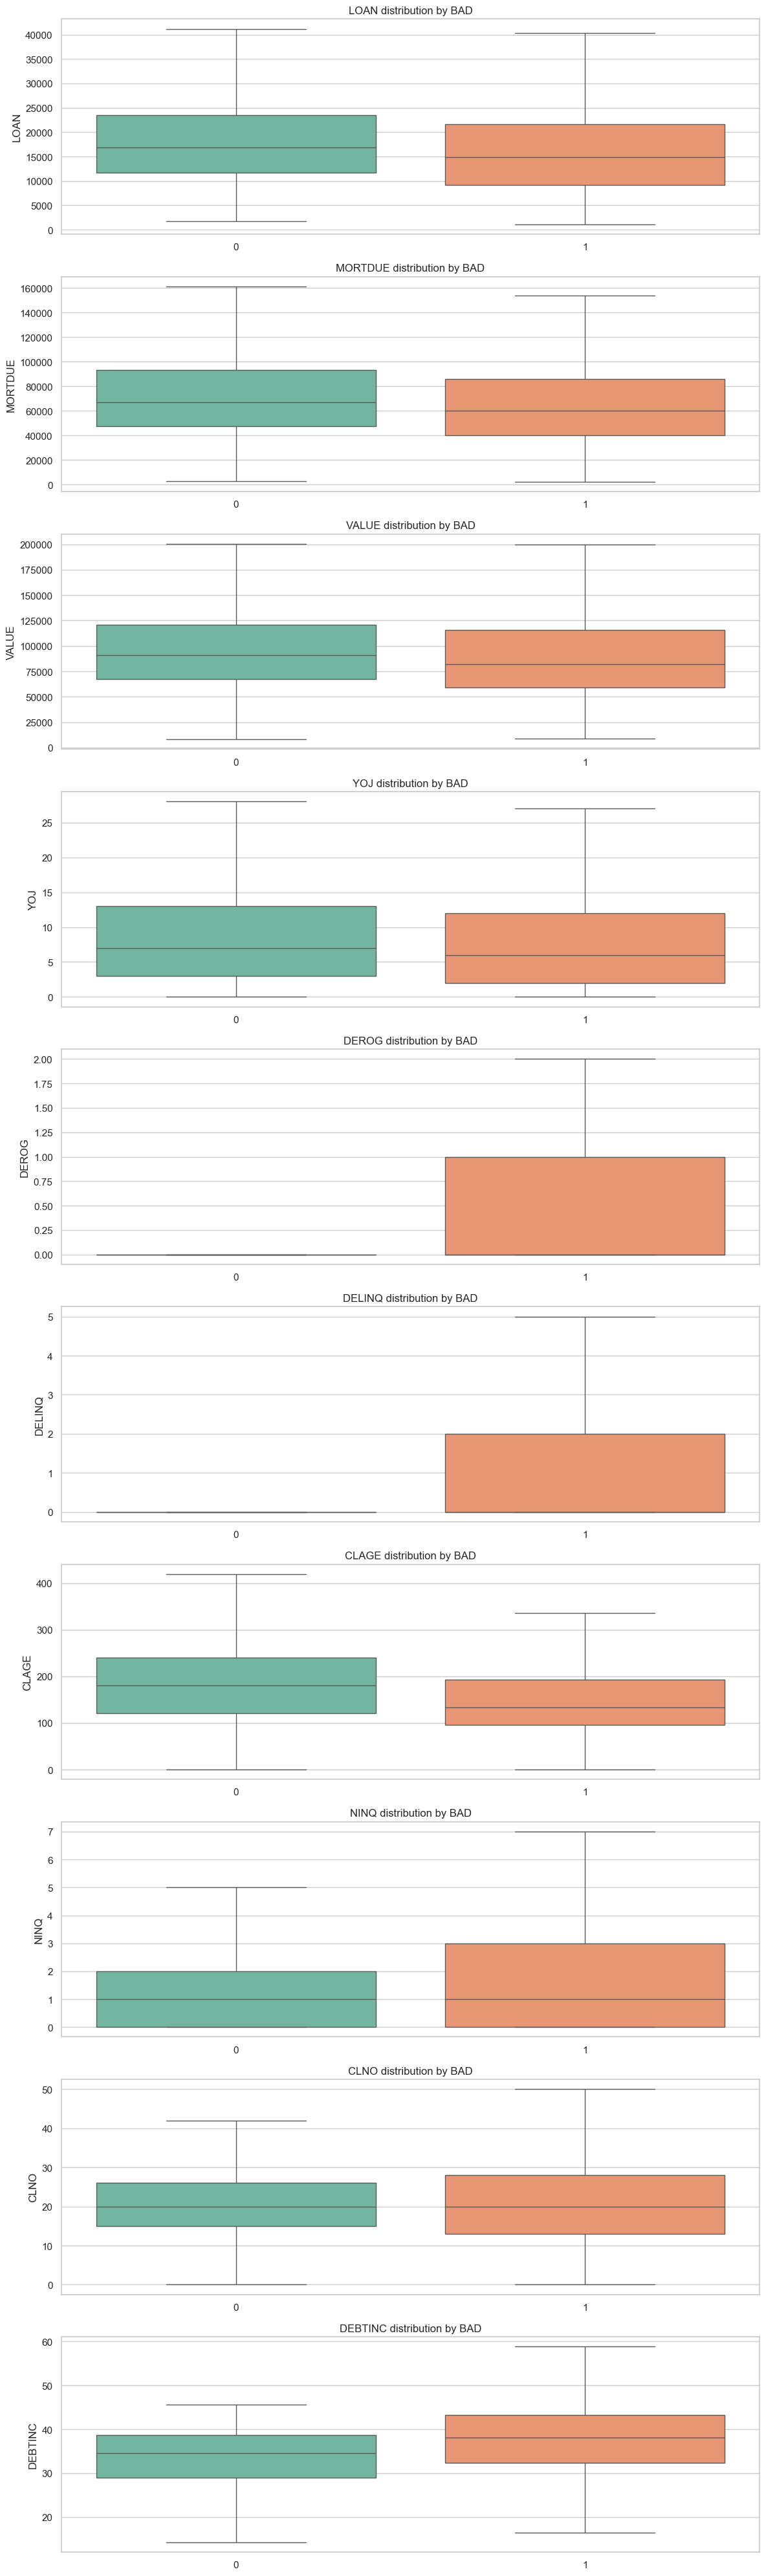

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the target is not included
features = train_data.select_dtypes(include=['int64', 'float64']).columns.drop('BAD')

# Set plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(features), figsize=(12, 4 * len(features)))

# Plot each feature's distribution grouped by 'BAD'
for i, col in enumerate(features):
    sns.boxplot(x='BAD', y=col, data=train_data, ax=axes[i], palette="Set2", showfliers=False)
    axes[i].set_title(f'{col} distribution by BAD')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


- YOJ:
+ BAD=1 applicants are more likely to have shorter job tenure.
+ Median and quartiles are significantly lower.
+ Indicates employment instability might correlate with default risk.
-> Strong indicator.

- DEROG:
+ BAD=0 is almost always zero (no derogatory marks).
+ BAD=1 shows multiple derogatory reports more frequently.
-> Very strong predictor — distinct distribution.

- DELINQ: Same as DEROG

- DEBTINC:
+ BAD=1 has higher debt-to-income ratios.
+ Clear upward shift in distribution.
+ Indicates they may be financially overextended.
+ A lot of mising values could be related to unemployment, which means that the income is low or even 0(if income is 0 dividing is not possible -> Could be left missing)
-> Very strong and interpretable risk factor.